In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.200d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.50d.txt
/kaggle/input/glove-global-vectors-for-word-representation/glove.6B.100d.txt
/kaggle/input/info-retreval/test_pos_neg.csv
/kaggle/input/info-retreval/test_neu_opi.csv
/kaggle/input/info-retreval/preprocessed_trainv2.csv
/kaggle/input/info-retreval/preprocessed_testv2.csv
/kaggle/input/info-retreval/preprocessed_testv1.csv
/kaggle/input/info-retreval/train_neu_opi.csv
/kaggle/input/info-retreval/preprocessed_testv3.csv
/kaggle/input/info-retreval/preprocessed_trainv1.csv
/kaggle/input/info-retreval/train_pos_neg.csv
/kaggle/input/info-retreval/train.csv
/kaggle/input/info-retreval/test.csv
/kaggle/input/info-retreval/preprocessed_trainv3.csv


In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
import pandas as pd
import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import nltk
import subprocess
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms

# SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# metric (AUC, ROC, sensitivity & specificity)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, TensorDataset
!pip install snntorch
import snntorch as snn
from snntorch import surrogate
from snntorch import utils
import snntorch.functional as SF
import math
!pip install ncps

import numpy as np
import torch.nn as nn
from ncps.wirings import AutoNCP
from ncps.torch import LTC
import pytorch_lightning as pl
import torch.utils.data as data
torch.manual_seed(2501)
# nltk.download('wordnet')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
# nltk.download("punkt")

# try:
#     nltk.data.find('wordnet.zip')
# except:
#     nltk.download('wordnet', download_dir='/kaggle/working/')
#     command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
#     subprocess.run(command.split())
#     nltk.data.path.append('/kaggle/working/')

from nltk.corpus import wordnet as wn



2024-04-12 09:08:32.276322: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-12 09:08:32.276415: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-12 09:08:32.422777: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.8 MB/s eta 0:00:00


In [3]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to /kaggle/working/...
Archive:  /kaggle/working/corpora/wordnet.zip
   creating: /kaggle/working/corpora/wordnet/
  inflating: /kaggle/working/corpora/wordnet/lexnames  
  inflating: /kaggle/working/corpora/wordnet/data.verb  
  inflating: /kaggle/working/corpora/wordnet/index.adv  
  inflating: /kaggle/working/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/corpora/wordnet/index.verb  
  inflating: /kaggle/working/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/corpora/wordnet/data.adj  
  inflating: /kaggle/working/corpora/wordnet/index.adj  
  inflating: /kaggle/working/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/corpora/wordne

In [4]:
def create_embedding_matrix(word_index, embedding_dict=None, d_model=100):
    """
     this function create the embedding matrix save in numpy array
    :param word_index: a dictionary with word: index_value
    :param embedding_dict: a dict with word embedding
    :d_model: the dimension of word pretrained embedding, here I just set to 100, we will define again
    :return a numpy array with embedding vectors for all known words
    """
    embedding_matrix = np.zeros((len(word_index) + 1, d_model))
    ## loop over all the words
    for word, index in word_index.items():
        if word in embedding_dict:
            embedding_matrix[index] = embedding_dict[word]
    return embedding_matrix

In [5]:
def plot_metrics(df_metrics):
    fig, axs = plt.subplots(3, 2, figsize=(15, 15))  # Creating a grid of subplots
    fig.suptitle('Training and Testing Metrics Over Epochs')

    # Plotting Train and Test Loss
    axs[0, 0].plot(df_metrics['Epoch'], df_metrics['Train Loss'], label='Train Loss')
    axs[0, 0].plot(df_metrics['Epoch'], df_metrics['Test Loss'], label='Test Loss', linestyle='--')
    axs[0, 0].set_title('Loss')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].set_ylabel('Loss')
    axs[0, 0].legend()

    # Plotting Train and Test Accuracy
    axs[0, 1].plot(df_metrics['Epoch'], df_metrics['Train Accuracy'], label='Train Accuracy')
    axs[0, 1].plot(df_metrics['Epoch'], df_metrics['Test Accuracy'], label='Test Accuracy', linestyle='--')
    axs[0, 1].set_title('Accuracy')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].set_ylabel('Accuracy')
    axs[0, 1].legend()

    # Plotting Train and Test Precision
    axs[1, 0].plot(df_metrics['Epoch'], df_metrics['Train Precision'], label='Train Precision')
    axs[1, 0].plot(df_metrics['Epoch'], df_metrics['Test Precision'], label='Test Precision', linestyle='--')
    axs[1, 0].set_title('Precision')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].set_ylabel('Precision')
    axs[1, 0].legend()

    # Plotting Train and Test Recall
    axs[1, 1].plot(df_metrics['Epoch'], df_metrics['Train Recall'], label='Train Recall')
    axs[1, 1].plot(df_metrics['Epoch'], df_metrics['Test Recall'], label='Test Recall', linestyle='--')
    axs[1, 1].set_title('Recall')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].set_ylabel('Recall')
    axs[1, 1].legend()

    # Plotting Train and Test F1 Score
    axs[2, 0].plot(df_metrics['Epoch'], df_metrics['Train F1 Score'], label='Train F1 Score')
    axs[2, 0].plot(df_metrics['Epoch'], df_metrics['Test F1 Score'], label='Test F1 Score', linestyle='--')
    axs[2, 0].set_title('F1 Score')
    axs[2, 0].set_xlabel('Epoch')
    axs[2, 0].set_ylabel('F1 Score')
    axs[2, 0].legend()

    # Plotting Epoch Time
    axs[2, 1].plot(df_metrics['Epoch'], df_metrics['Epoch Time'], label='Epoch Time')
    axs[2, 1].set_title('Time per Epoch')
    axs[2, 1].set_xlabel('Epoch')
    axs[2, 1].set_ylabel('Time (sec)')
    axs[2, 1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout
    plt.show()

In [6]:
# def preprocess_text(text, tokenizer):
#     # Remove special characters
#     text = re.sub(r'[^a-zA-Z0-9\s]','', text) # pattern matches any character not alphanumeric
#     tokens = word_tokenize(text)
#     tokens = [token for token in tokens if re.match(r'\b\w+\b',token)]
#     stop_words = set(stopwords.words('english'))
#     tokens = [token for token in tokens if token.lower() not in stop_words]
#     lemmatizer = WordNetLemmatizer()
#     tokens = [lemmatizer.lemmatize(token) for token in tokens]
#     stemmer = PorterStemmer()
#     tokens = [stemmer.stem(token) for token in tokens]
#     return ' '.join(tokens)

# # Read the CSV file
# df = pd.read_csv('train_neu_opi.csv')

# # Preprocess the 'Text' column
# df['preprocessed_text'] = df['Headline'].apply(preprocess_text)

# # Calculate TF-IDF for each preprocessed headline
# tfidf = TfidfVectorizer()
# tfidf_matrix = tfidf.fit_transform(df['preprocessed_text'])

In [7]:


def preprocess_text(text):
    # Initial preprocessing to remove special characters and tokenize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()
    
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if re.match(r'\b\w+\b', token) and token.lower() not in stop_words]
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def tokenize_data(train_texts, test_texts, max_len=25):
    # Preprocess texts
    processed_train_texts = [preprocess_text(text) for text in train_texts]
    processed_test_texts = [preprocess_text(text) for text in test_texts]

    # Create and fit tokenizer on the training texts
    tokenizer = tf.keras.preprocessing.text.Tokenizer()
    tokenizer.fit_on_texts(processed_train_texts)
    
    # Convert texts to sequences and pad them
    train_sequences = tokenizer.texts_to_sequences(processed_train_texts)
    test_sequences = tokenizer.texts_to_sequences(processed_test_texts)
    padded_train_sequences = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, maxlen=max_len)
    padded_test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len)
    
    return padded_train_sequences, padded_test_sequences, tokenizer

dfTest = pd.read_csv("/kaggle/input/info-retreval/test_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain = pd.read_csv("/kaggle/input/info-retreval/train_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain["Label"]=dfTrain["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)
dfTest["Label"]=dfTest["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)


glove = pd.read_csv('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

MAX_LEN = 25
train_texts = dfTrain.Headline.values.tolist() 
test_texts = dfTest.Headline.values.tolist()

X_train, X_test, tokenizer = tokenize_data(train_texts, test_texts)
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dict=glove_embedding, d_model=100)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
batch_size = 128

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_train_labels_tensor = torch.tensor(dfTrain["Label"], dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, X_train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=3)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
X_test_labels_tensor = torch.tensor(dfTest["Label"], dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, X_test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=3)
embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float).to(device)

In [8]:
# dfTest = pd.read_csv("/kaggle/input/info-retreval/test_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
# dfTrain = pd.read_csv("/kaggle/input/info-retreval/train_pos_neg.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
# dfTrain["Label"]=dfTrain["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)
# dfTest["Label"]=dfTest["Label"].map({"POSITIVE":1, "NEGATIVE":0}).sample(frac=1).reset_index(drop=True)


# glove = pd.read_csv('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
# glove_embedding = {key: val.values for key, val in glove.T.items()}

# MAX_LEN = 25
# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# tokenizer.fit_on_texts(dfTrain.Headline.values.tolist())



# X_train = tokenizer.texts_to_sequences(dfTrain.Headline.values)
# X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=MAX_LEN)
# embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dict=glove_embedding, d_model=100)

# X_test = tokenizer.texts_to_sequences(dfTest.Headline.values)
# X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LEN)

# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
# batch_size = 128

# X_train_tensor = torch.tensor(X_train, dtype=torch.long)
# X_train_labels_tensor = torch.tensor(dfTrain["Label"], dtype=torch.long)
# train_dataset = TensorDataset(X_train_tensor, X_train_labels_tensor)
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=3)
# X_test_tensor = torch.tensor(X_test, dtype=torch.long)
# X_test_labels_tensor = torch.tensor(dfTest["Label"], dtype=torch.long)
# test_dataset = TensorDataset(X_test_tensor, X_test_labels_tensor)
# test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=3)
# embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float).to(device)

In [9]:
class MetricsLogger(pl.Callback):
    def __init__(self):
        super().__init__()
        self.metrics = {
            'Epoch': [],
            'Train Loss': [],
            'Train Accuracy': [],
            'Train Precision': [],
            'Train Recall': [],
            'Train F1 Score': [],
            'Test Loss': [],
            'Test Accuracy': [],
            'Test Precision': [],
            'Test Recall': [],
            'Test F1 Score': [],
            'Epoch Time': []
        }
        self.start_time = None

    def on_train_epoch_start(self, trainer, pl_module):
        self.start_time = time.time()

    def on_train_epoch_end(self, trainer, pl_module, outputs=None):
        epoch_time = time.time() - self.start_time
        self.metrics['Epoch Time'].append(epoch_time)
        self.metrics['Epoch'].append(trainer.current_epoch + 1)  # Epochs are zero-indexed

        train_loss = trainer.callback_metrics['train_loss'].item()
        train_acc = trainer.callback_metrics['train_acc'].item()
        train_prec = trainer.callback_metrics['train_prec'].item()
        train_recall = trainer.callback_metrics['train_recall'].item()
        train_f1 = trainer.callback_metrics['train_f1'].item()

        self.metrics['Train Loss'].append(train_loss)
        self.metrics['Train Accuracy'].append(train_acc)
        self.metrics['Train Precision'].append(train_prec)
        self.metrics['Train Recall'].append(train_recall)
        self.metrics['Train F1 Score'].append(train_f1)
        
    def on_validation_epoch_end(self, trainer, pl_module):
        test_loss = trainer.callback_metrics['test_loss'].item()
        test_acc = trainer.callback_metrics['test_acc'].item()
        test_prec = trainer.callback_metrics['test_prec'].item()
        test_recall = trainer.callback_metrics['test_recall'].item()
        test_f1 = trainer.callback_metrics['test_f1'].item()
        self.metrics['Test Loss'].append(test_loss)
        self.metrics['Test Accuracy'].append(test_acc)
        self.metrics['Test Precision'].append(test_prec)
        self.metrics['Test Recall'].append(test_recall)
        self.metrics['Test F1 Score'].append(test_f1)

    def compile_metrics(self):    
        if len(self.metrics['Test Loss'])>len(self.metrics['Epoch']):
            self.metrics['Test Loss'] = self.metrics['Test Loss'][1:]
            self.metrics['Test Accuracy'] = self.metrics['Test Accuracy'][1:]
            self.metrics['Test Precision'] = self.metrics['Test Precision'][1:]
            self.metrics['Test Recall'] = self.metrics['Test Recall'][1:]
            self.metrics['Test F1 Score'] = self.metrics['Test F1 Score'][1:]
            
        return pd.DataFrame(self.metrics)

In [10]:

class AttentionLayer(nn.Module):
    def __init__(self, hidden_size):
        super(AttentionLayer, self).__init__()
        self.query_layer = nn.Linear(hidden_size, hidden_size)
        self.key_layer = nn.Linear(hidden_size, hidden_size)
        self.value_layer = nn.Linear(hidden_size, hidden_size)

    def forward(self, x):
        # x is now expected to be of shape [batch_size, seq_len, hidden_size]
        query = self.query_layer(x)
        key = self.key_layer(x)
        value = self.value_layer(x)

        # Compute attention scores
        # We use batch matrix multiplication, adjusting dimensions accordingly
        scores = torch.bmm(query, key.transpose(1, 2)) / (query.size(2) ** 0.5)
        attn_weights = F.softmax(scores, dim=-1)

        # Apply attention weights to values
        attended = torch.bmm(attn_weights, value)

        return attended

In [11]:
class SequenceLearner(pl.LightningModule):
    def __init__(self,embedding_matrix, hidden_feat=16, lr=0.005):
        super().__init__()
        wiring = AutoNCP(hidden_feat, 2)  
        self.model = LTC(embedding_matrix.size(1), wiring, batch_first=True)
#         self.attention = AttentionLayer(embedding_matrix.size(1))
#         self.attention2 = AttentionLayer(8)
#         self.dense_relu = nn.Sequential(
#             nn.Linear(200, 16),  # Adjust 'whatever_the_sequence_length_is'
#             nn.ReLU()
#         )
        self.lr = lr
        self.embeding = nn.Embedding.from_pretrained(embedding_matrix, freeze=True)
        self.loss_fn = nn.BCEWithLogitsLoss()  
        self.final_linear = nn.Linear(50, 1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        y = y.float() 
        y_hat = y_hat.view_as(y)
        loss = self.loss_fn(y_hat, y)  # Calculate BCE loss
        self.log("train_loss", loss, prog_bar=True)
        
        y_hat_bin = torch.sigmoid(y_hat) > 0.5  # Convert to binary predictions
        acc = accuracy_score(y.cpu(), y_hat_bin.cpu())
        prec = precision_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)
        rec = recall_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)
        f1 = f1_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)

        self.log("train_acc", acc, prog_bar=True)
        self.log("train_prec", prec, prog_bar=True)
        self.log("train_recall", rec, prog_bar=True)
        self.log("train_f1", f1, prog_bar=True)
        return {"loss": loss, "train_acc": acc, "train_prec": prec, "train_recall": rec, "train_f1": f1}
    
    def forward(self, x):
        x = self.embeding(x)
#         x = self.attention(x)
        y_hat, _ = self.model.forward(x)
#         y_hat = self.attention2(y_hat)
        y_hat_flat = y_hat.view(y_hat.size(0), -1)  # New shape: [batch_size, sequence_length * num_features]
#         y_hat_flat = self.dense_relu(y_hat_flat)
        output = self.final_linear(y_hat_flat)  # New shape: [batch_size, output_features]
        
        return output
        
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        y_hat = y_hat.view_as(y)
        y = y.float() 
        loss = self.loss_fn(y_hat, y)  # Calculate BCE loss
        self.log("test_loss", loss, prog_bar=True)
        
        y_hat_bin = torch.sigmoid(y_hat) > 0.5  # Convert to binary predictions
        acc = accuracy_score(y.cpu(), y_hat_bin.cpu())
        prec = precision_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)
        rec = recall_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)
        f1 = f1_score(y.cpu(), y_hat_bin.cpu(), zero_division=0)

        self.log("test_acc", acc, prog_bar=True)
        self.log("test_prec", prec, prog_bar=True)
        self.log("test_recall", rec, prog_bar=True)
        self.log("test_f1", f1, prog_bar=True)

        return {"val_loss": loss, "val_acc": acc, "val_prec": prec, "val_rec": rec, "val_f1": f1}


    def test_step(self, batch, batch_idx):
        return self.validation_step(batch, batch_idx)

    def configure_optimizers(self):
        return torch.optim.Adam(self.model.parameters(), lr=self.lr)

In [12]:
learn = SequenceLearner(embedding_matrix_tensor, 64, lr=0.005)
trainer = pl.Trainer(
    logger=pl.loggers.CSVLogger("log"),
    max_epochs=100,callbacks=[MetricsLogger()],
    gradient_clip_val=1,
)
trainer.fit(learn, train_loader,test_loader)
metrics_logger = trainer.callbacks[0]
metrics_df = metrics_logger.compile_metrics()


alloc!


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

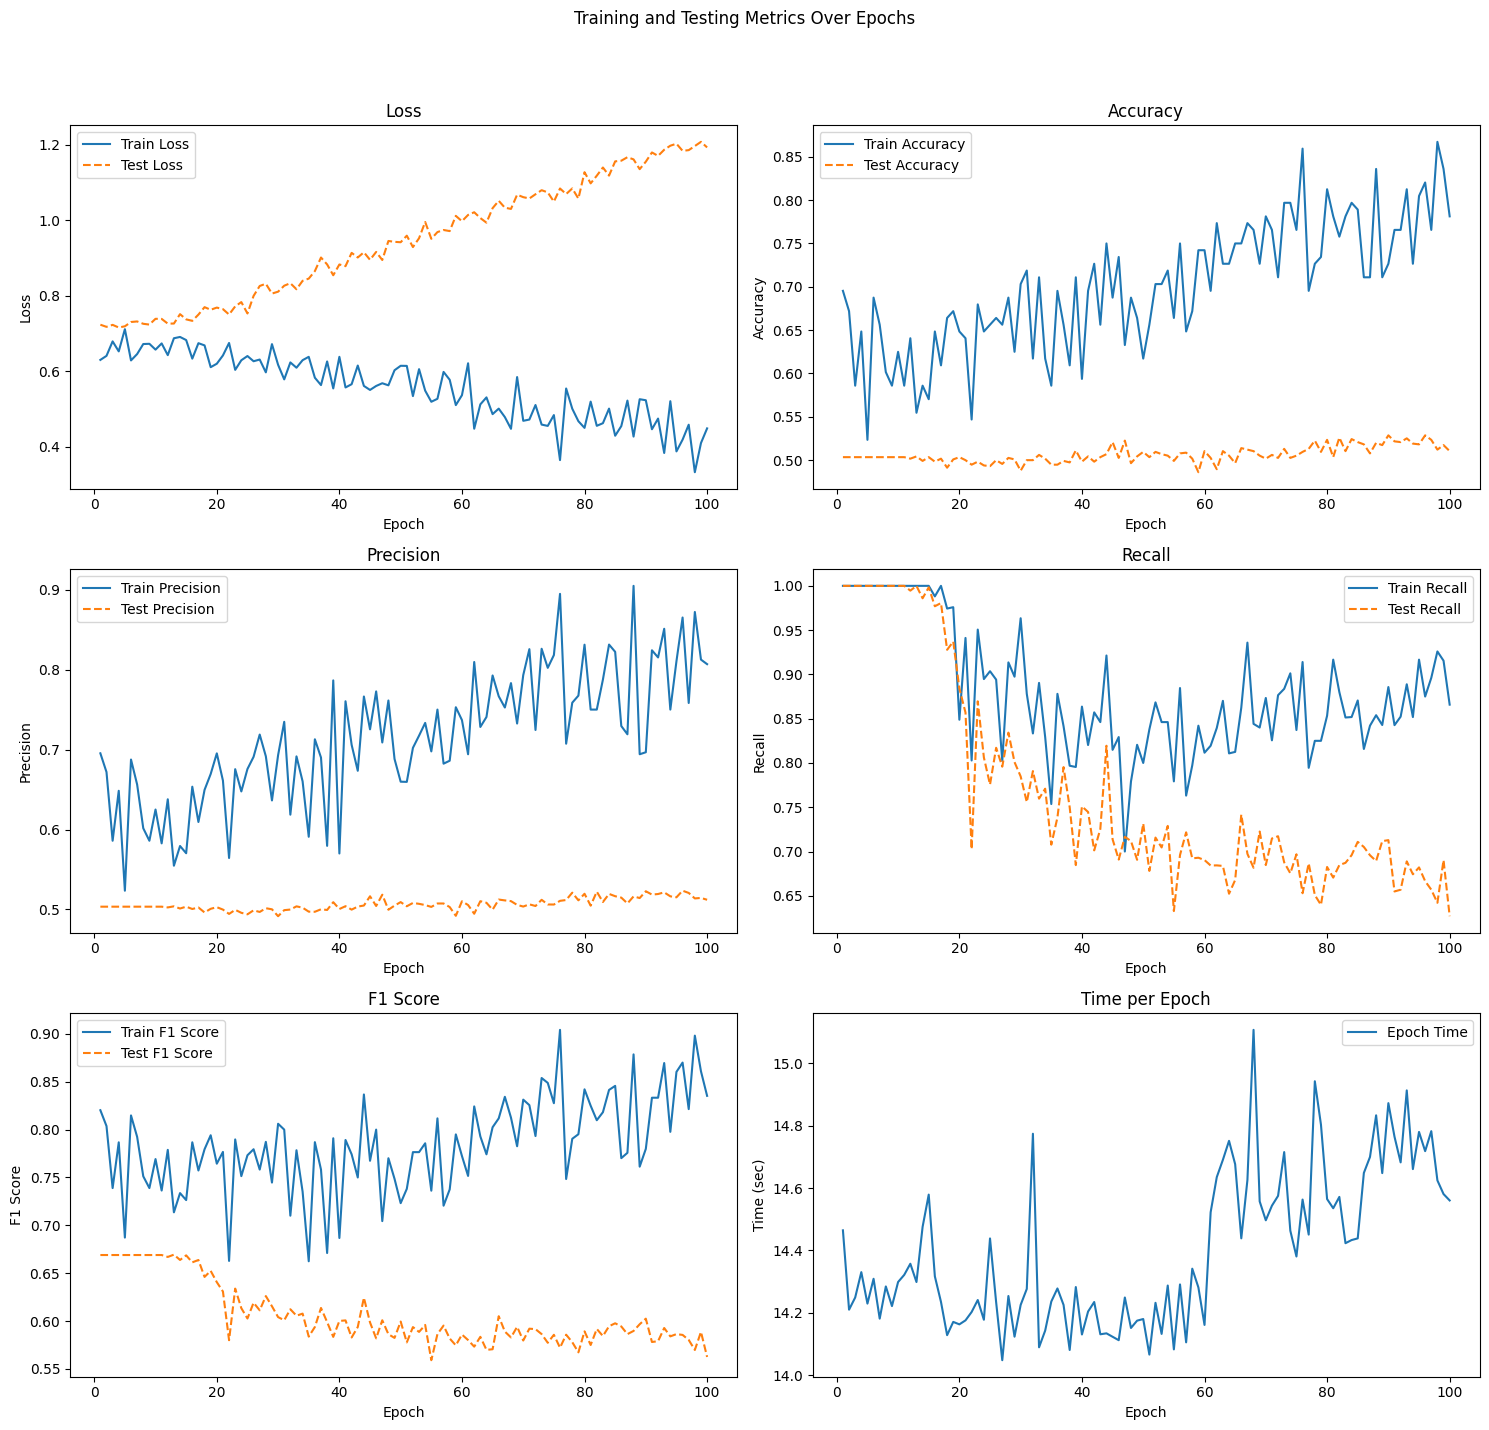

In [13]:
plot_metrics(metrics_df)

In [14]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())

Total Training Time: 1439.821899175644
Best Test Loss: 0.7153439521789551
Best Test Accuracy: 0.5286458134651184
Best Test Precision: 0.5234745740890503
Best Test Recall: 1.0
Best Test F1 Score: 0.6693422794342041


In [15]:
dfTest = pd.read_csv("/kaggle/input/info-retreval/test_neu_opi.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain = pd.read_csv("/kaggle/input/info-retreval/train_neu_opi.csv", encoding = 'ISO-8859-1').rename(columns={"Sentiment":"Label"})
dfTrain["Label"]=dfTrain["Label"].map({"OPINIONATED":1, "NEUTRAL":0}).sample(frac=1).reset_index(drop=True)
dfTest["Label"]=dfTest["Label"].map({"OPINIONATED":1, "NEUTRAL":0}).sample(frac=1).reset_index(drop=True)


glove = pd.read_csv('../input/glove-global-vectors-for-word-representation/glove.6B.100d.txt', sep=" ", quoting=3, header=None, index_col=0)
glove_embedding = {key: val.values for key, val in glove.T.items()}

MAX_LEN = 25
train_texts = dfTrain.Headline.values.tolist() 
test_texts = dfTest.Headline.values.tolist()

X_train, X_test, tokenizer = tokenize_data(train_texts, test_texts)
embedding_matrix = create_embedding_matrix(tokenizer.word_index, embedding_dict=glove_embedding, d_model=100)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("mps") if torch.backends.mps.is_available() else torch.device("cpu")
batch_size = 128

X_train_tensor = torch.tensor(X_train, dtype=torch.long)
X_train_labels_tensor = torch.tensor(dfTrain["Label"], dtype=torch.long)
train_dataset = TensorDataset(X_train_tensor, X_train_labels_tensor)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True, num_workers=3)
X_test_tensor = torch.tensor(X_test, dtype=torch.long)
X_test_labels_tensor = torch.tensor(dfTest["Label"], dtype=torch.long)
test_dataset = TensorDataset(X_test_tensor, X_test_labels_tensor)
test_loader = DataLoader(test_dataset, batch_size=batch_size, drop_last=True, num_workers=3)
embedding_matrix_tensor = torch.tensor(embedding_matrix, dtype=torch.float).to(device)

In [16]:
learn = SequenceLearner(embedding_matrix_tensor, 64, lr=0.005)
trainer = pl.Trainer(
    logger=pl.loggers.CSVLogger("log"),
    max_epochs=100,callbacks=[MetricsLogger()],
    gradient_clip_val=1,
)
trainer.fit(learn, train_loader,test_loader)
metrics_logger = trainer.callbacks[0]
metrics_df = metrics_logger.compile_metrics()

alloc!


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

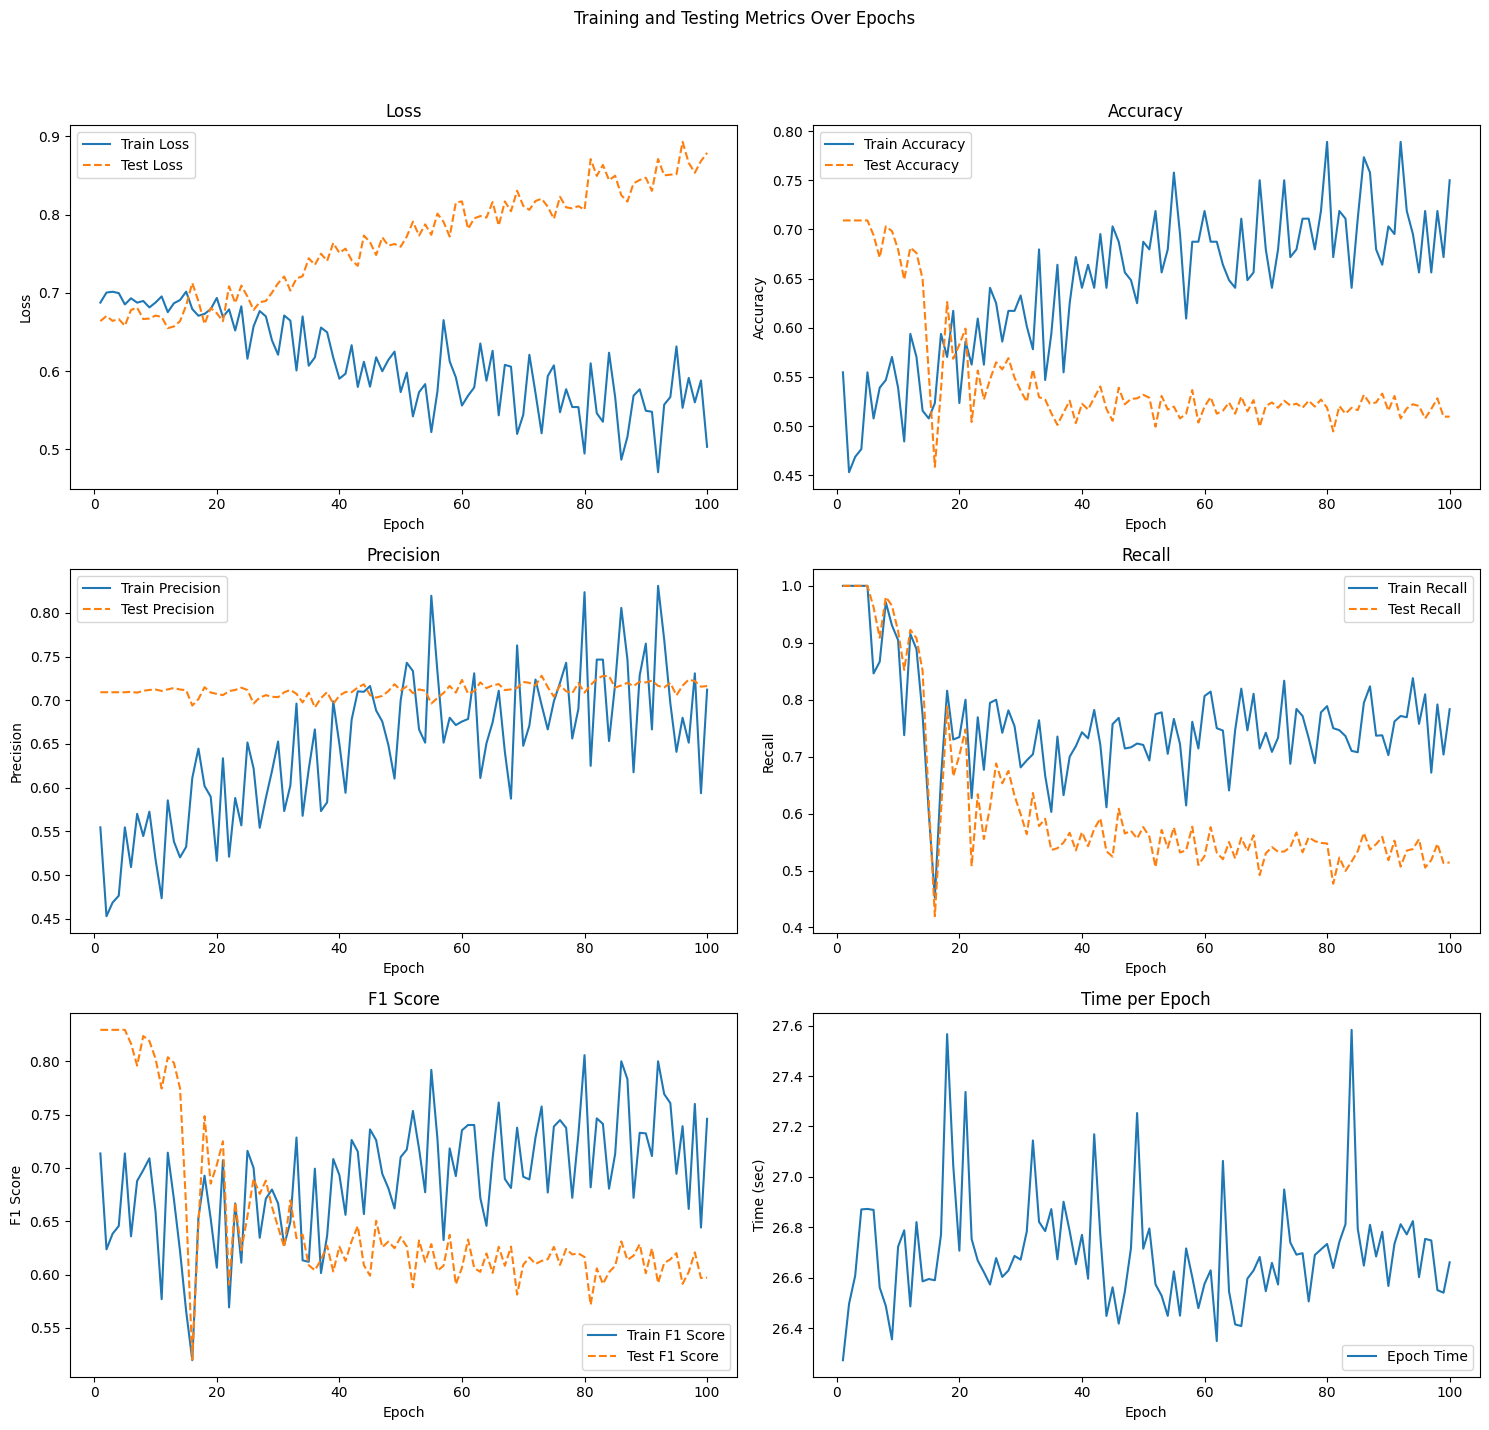

In [17]:
plot_metrics(metrics_df)

In [18]:
print("Total Training Time:", metrics_df["Epoch Time"].sum())
print("Best Test Loss:", metrics_df["Test Loss"].min())
print("Best Test Accuracy:", metrics_df["Test Accuracy"].max())
print("Best Test Precision:", metrics_df["Test Precision"].max())
print("Best Test Recall:", metrics_df["Test Recall"].max())
print("Best Test F1 Score:", metrics_df["Test F1 Score"].max())

Total Training Time: 2670.355432033539
Best Test Loss: 0.6549672484397888
Best Test Accuracy: 0.7091346383094788
Best Test Precision: 0.7280389070510864
Best Test Recall: 1.0
Best Test F1 Score: 0.8294657468795776
